<DIV ALIGN=CENTER>

# Introduction to Network Analysis: Graph Concepts
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

## Introduction

In this IPython Notebook, we build on 

-----



-----

### Student Activity

In the preceding cells, we introduced several basic graph concepts,
including XX YY ZZ. Now
that you have run the Notebook, go back and make the following changes
to see how the results change.

1. Change 
2. Replace 
3. Try using 

-----

In [145]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

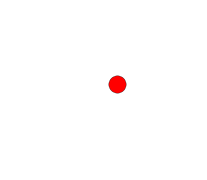

In [146]:
import networkx as nx

g = nx.Graph() 
g.add_node(1) 

plt.figure(figsize=(2,2))
nx.draw(g)
plt.show()

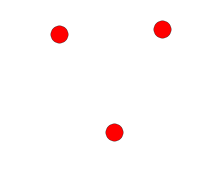

In [147]:
g.add_nodes_from([2, 3]) 

plt.figure(figsize=(2,2))
nx.draw(g)
plt.show()

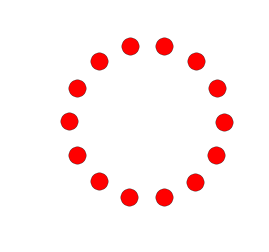

In [148]:
g.add_nodes_from(range(4, 15)) 

plt.figure(figsize=(3, 3))
nx.draw(g)
plt.show()

In [149]:
print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [150]:
import math

g.add_node(math.pi)
g.add_node(math.exp)

fout = open('tmp.dat','w')

g.add_node(fout)

print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 3.141592653589793, <_io.TextIOWrapper name='tmp.dat' mode='w' encoding='UTF-8'>, <built-in function exp>]


In [151]:
# Remove single node
g.remove_node(14)

g.remove_node(math.pi)
g.remove_node(math.exp)
g.remove_node(fout)

#remove list of nodes
g.remove_nodes_from([11, 12, 13])

#show results
print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


-----

## Edges


-----

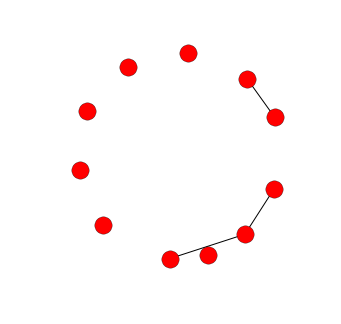

In [153]:
# Add single edge

g.add_edge(0, 1)

edgs = (3, 6)
g.add_edge(*edgs)

plt.figure(figsize=(4, 4))
nx.draw(g)
plt.show()

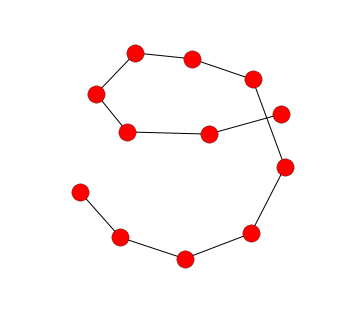

In [94]:
g.remove_edge(0, 1)
g.remove_edge(1, 2)

edgs = [(idx, idx + 1) for idx in range(g.order())]

g.add_edges_from(edgs)

plt.figure(figsize=(4, 4))
nx.draw(g)
plt.show()

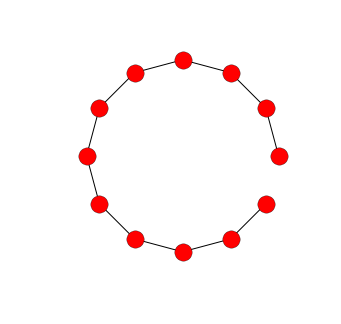

In [96]:
plt.figure(figsize=(4, 4))
nx.draw_circular(g)
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


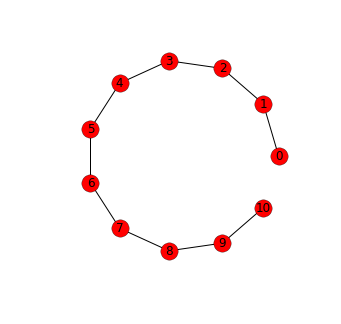

In [154]:
# Shortcut to make this graph
h = nx.path_graph(11)

print(h.nodes())

plt.figure(figsize=(4, 4))
nx.draw_circular(h, with_labels=True)
plt.show()

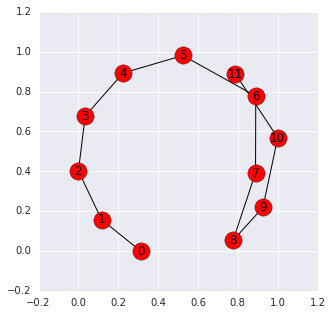

In [95]:
plt.figure(figsize=(5, 5))

nx.draw_networkx(g) 
plt.show()

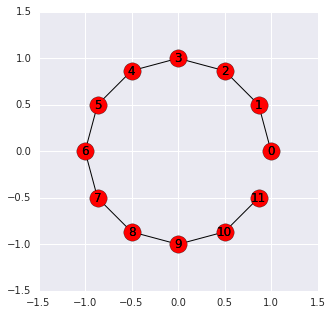

In [98]:
# Plot and specify node positions

plt.figure(figsize=(5, 5))
pos=nx.circular_layout(g)
nx.draw_networkx(g, pos)
nx.draw_networkx_labels(g, pos)
plt.show()

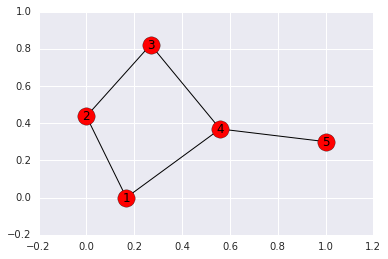

In [155]:
# Create a new arbitrary graph by hand, with string labels

g = nx.Graph()  
g.add_node('1')  
g.add_node('2')  
g.add_node('3')  
g.add_node('4')  
g.add_node('5')  
g.add_edge('1', '2')  
g.add_edge('2', '3')  
g.add_edge('3', '4')  
g.add_edge('4', '1')  
g.add_edge('4', '5')

# plot graph
nx.draw_networkx(g)
plt.show()

In [156]:
n_nds = g.order() # or g.number_of_nodes()
n_edgs = g.size() # or g.number_of_edges()
print('Graph has {0} nodes and {1} edges'.format(n_nds, n_edgs))

print('\nNodes in the Graph:')
print(g.nodes())

print('\nEdges in the Graph:')
print(g.edges())

nd = '4'

# The node degree is the number of edges adjacent to that node.
print('\nNeighbors to node #{0}'.format(nd))
print(g.degree(nd))

# List neihgbors
print('\nNeighbors to node #{0}'.format(nd))
print(g.neighbors(nd))

Graph has 5 nodes and 5 edges

Nodes in the Graph:
['5', '4', '1', '2', '3']

Edges in the Graph:
[('5', '4'), ('4', '3'), ('4', '1'), ('1', '2'), ('2', '3')]

Neighbors to node #4
3

Neighbors to node #4
['3', '5', '1']


-----

## Attributes

-----

{'my_name': 'Test', 'type': 'Demo'}


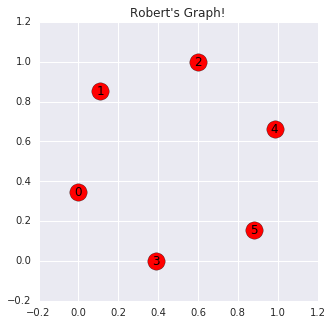

In [101]:
# Graph Attributes

# Specify an attribute at graph creation
g = nx.Graph(my_name = 'Test')
g.add_nodes_from(range(6))

# Add an attribute by using dictionary
g.graph['type'] = 'Demo'
print(g.graph)

# Set a default attribute
g.name = 'Robert\'s Graph!'

plt.figure(figsize=(5, 5))
nx.draw_networkx(g) 
plt.title(g.name)
plt.show()

In [102]:
# Node attributes

nd = 6
g.add_node(nd, name='Robert')
print(nd, g.node[nd])
print('Node {0} name = {1}'.format(nd, g.node[nd]['name']))

nd = 5
g.node[nd]['name'] = 'Edward'
print(nd, g.node[nd])
print('Node {0} name = {1}'.format(nd, g.node[nd]['name']))

6 {'name': 'Robert'}
Node 6 name = Robert
5 {'name': 'Edward'}
Node 5 name = Edward


In [103]:
# Edge attributes

# Specify attribute at edge creation
g.add_edge('1', 6, rltn='friends')
print(g['1'][6])

# Special edge attribute is weight
g.add_edge('1', '3', weight=10.0)
print(g['1']['3'])

# Add multuple weight attribtues
g.add_edges_from([(idx, idx + 1, {'weight': (idx + 1) * 10}) 
                  for idx in range(g.order())])


{'rltn': 'friends'}
{'weight': 10.0}


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, '3', '1']


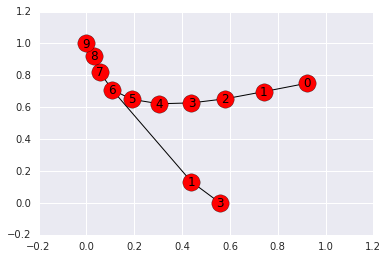

In [107]:
print(g.nodes())

nx.draw_networkx(g)
plt.show()

-----

## Matrix Representations


-----

In [108]:
# Adjacency Matrix
adj_mat = nx.adjacency_matrix(g) 

print(adj_mat.todense())

[[  0.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.   0.  20.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  20.   0.  30.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  30.   0.  40.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  40.   0.  50.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  50.   0.  60.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  60.   0.  70.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.  70.   0.  80.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  80.   0.  90.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  90.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  10.   0.]]


In [109]:
# Incidence Matrix

inc_mat = nx.incidence_matrix(g)
print(inc_mat.todense())

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.]]


-----

## Directed Graphs


-----

Nodes: ['5', '4', '1', '2', '3']
Edges: [('4', '1'), ('4', '5'), ('1', '2'), ('2', '3'), ('3', '4')]


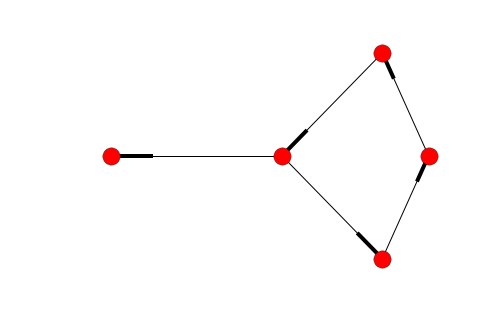

In [137]:
dg = nx.DiGraph()  
dg.add_nodes_from(['1', '2', '3', '4', '5'])   
dg.add_edge('1', '2')  
dg.add_edge('2', '3')  
dg.add_edge('3', '4')  
dg.add_edge('4', '1')  
dg.add_edge('4', '5')  

print('Nodes:', dg.nodes())
print('Edges:', dg.edges())

nx.draw_spectral(dg)
plt.show()

Nodes: [1, 2, 3, 4, 5]
Edges: [(1, 2), (2, 3), (3, 1), (3, 4), (3, 5)]

Number of edges entering a node:
{1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

Number of edges leaving a node:
{1: 1, 2: 1, 3: 3, 4: 0, 5: 0}


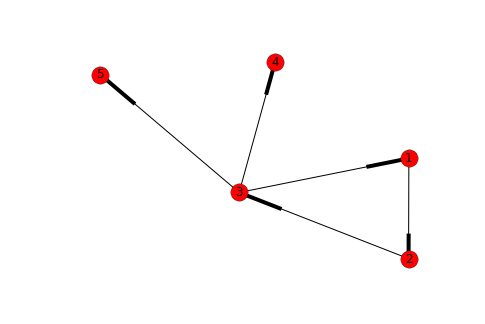

In [138]:
dg = nx.DiGraph()   
dg.add_edge(1, 2)   
dg.add_edge(2, 3)   
dg.add_edge(3, 4)   
dg.add_edge(3, 1)   
dg.add_edge(3, 5) 

print('Nodes:', dg.nodes())
print('Edges:', dg.edges())

print('\nNumber of edges entering a node:')
print(dg.in_degree())

print('\nNumber of edges leaving a node:')
print(dg.out_degree())

nx.draw(dg, with_labels=True)
plt.show() 


Number of edges entering a node:
{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}

Number of edges leaving a node:
{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0}

Weighted Number of edges entering a node:
{0: 0, 1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60, 7: 70, 8: 80}

Weighted Number of edges leaving a node:
{0: 10, 1: 20, 2: 30, 3: 40, 4: 50, 5: 60, 6: 70, 7: 80, 8: 0}


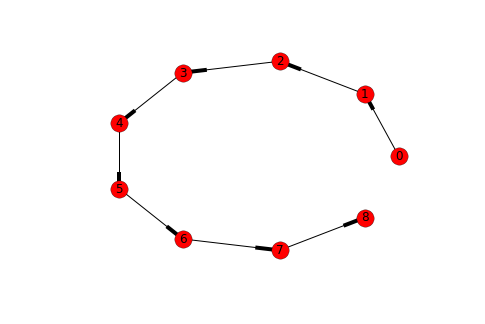

In [139]:
dg = nx.DiGraph()  
dg.add_nodes_from(range(8))

dg.add_weighted_edges_from([(idx, idx + 1, (idx + 1) * 10)
                           for idx in range(dg.order())])

print('\nNumber of edges entering a node:')
print(dg.in_degree())

print('\nNumber of edges leaving a node:')
print(dg.out_degree())

print('\nWeighted Number of edges entering a node:')
print(dg.in_degree(weight='weight'))

print('\nWeighted Number of edges leaving a node:')
print(dg.out_degree(weight='weight'))

nx.draw_circular(dg, with_labels=True)
plt.show() 

-----

## Multigraphs


-----

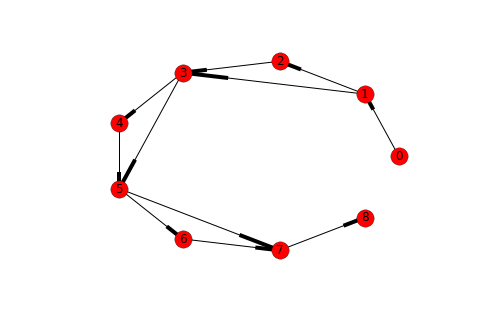

In [144]:
mg = nx.MultiDiGraph()
mg.add_nodes_from(range(8))

mg.add_weighted_edges_from([(idx, idx + 1, (idx + 1) * 10)
                           for idx in range(mg.order())])

mg.add_weighted_edges_from([(1, 3, 0.5), (3, 5, 0.25), (5, 7, 0.125)])

nx.draw_circular(mg, with_labels=True)
plt.show()